### Libraries

In [1]:
# pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Libraries for Data extraction 
from datetime import datetime
import yfinance as yf


#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Data Extraction

Objective is to get the data of RELIANCE INDUSTRIES from 01/01/2015 to till date.

Columns required are Open,High,Low,Close

In [3]:
# Defining Parameters
start_date = datetime(2015,1,1)
end_date = datetime.today()

#Data downloading
data = yf.download('RELIANCE.NS',start=start_date,end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988922,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603516,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421
...,...,...,...,...,...,...
2023-01-10,2606.000000,2606.000000,2546.000000,2558.399902,2558.399902,3713755
2023-01-11,2552.500000,2558.000000,2521.100098,2526.149902,2526.149902,5311657
2023-01-12,2524.850098,2532.500000,2465.000000,2471.600098,2471.600098,8163366


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988922,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603516,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-10,2606.000000,2606.000000,2546.000000,2558.399902,2558.399902,3713755
2023-01-11,2552.500000,2558.000000,2521.100098,2526.149902,2526.149902,5311657
2023-01-12,2524.850098,2532.500000,2465.000000,2471.600098,2471.600098,8163366
2023-01-13,2458.399902,2472.899902,2434.600098,2467.600098,2467.600098,9515473
2023-01-16,2472.699951,2479.649902,2427.000000,2444.100098,2444.100098,6285468


In [6]:
data.drop({'Adj Close','Volume','Open','High','Low'},axis=1,inplace = True)
data

,Close
Date,
2015-01-01,439.781311
2015-01-02,438.617340
2015-01-05,433.812897
2015-01-06,414.124512
2015-01-07,423.139069
...,...
2023-01-10,2558.399902
2023-01-11,2526.149902
2023-01-12,2471.600098


### EDA

In [7]:
data.head()

,Close
Date,
2015-01-01,439.781311
2015-01-02,438.617340
2015-01-05,433.812897
2015-01-06,414.124512
2015-01-07,423.139069


In [8]:
data.tail()

,Close
Date,
2023-01-10,2558.399902
2023-01-11,2526.149902
2023-01-12,2471.600098
2023-01-13,2467.600098
2023-01-16,2444.100098


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2015-01-01 to 2023-01-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1987 non-null   float64
dtypes: float64(1)
memory usage: 31.0 KB


In [10]:
data.isna().sum()

Close    0
dtype: int64

In [11]:
data.duplicated().sum()

58

In [12]:
data.describe()

,Close
count,1987.000000
mean,1321.584657
std,754.876245
min,401.568542
25%,532.675751
50%,1177.983887
75%,2054.599976
max,2819.850098


Correlation matrix shows that data is highly correlated.

Text(0.5, 1.0, 'Reliance stock Close Prices')

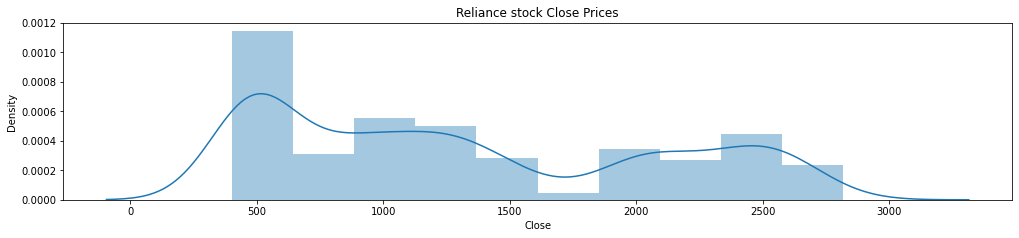

In [13]:
#Distplots to check the distribution of data

plt.figure(figsize=(17,15))
plt.subplot(4,1,4)
sns.distplot(data['Close'])
plt.title("Reliance stock Close Prices")

#### To check normality of the data 
Shapiro test(p-value > 0.05 -- Normally distributed data)



In [14]:
from scipy import stats

shapiro_test = stats.shapiro(data)
print('stats= ', shapiro_test.statistic,'\npvalue = ',shapiro_test.pvalue)

stats=  0.8922933340072632 
pvalue =  3.5689167914103643e-35


Text(0.5, 1.0, 'Close')

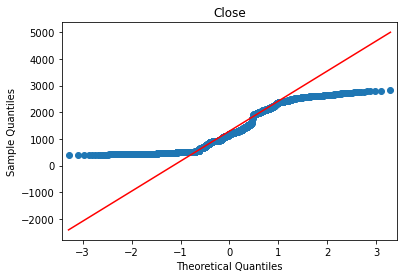

In [15]:
# QQ Plot

import statsmodels.api as sm

sm.qqplot(data['Close'], line='q')
plt.title('Close')

{'whiskers': [<matplotlib.lines.Line2D at 0x198695c4a00>,
 'caps': [<matplotlib.lines.Line2D at 0x198695c4fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x198695c4730>],
 'medians': [<matplotlib.lines.Line2D at 0x198695d3580>],
 'fliers': [<matplotlib.lines.Line2D at 0x198695d3850>],
 'means': []}

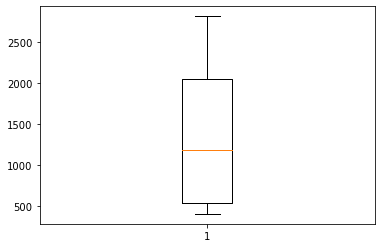

In [16]:
plt.boxplot(data)

Since pvalue < 0.05 & from the QQ plot, we can infer that data is not normally distributed

Hence to make data normally distributed we need to do minmaxscaling to the data.

In [17]:
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()

# data1 = pd.DataFrame()
# data1[data.columns] = minmax.fit_transform(data)
# data1

In [18]:
data.skew()
#Allowable range is from -2 to +2

Close    0.427729
dtype: float64

In [19]:
data.kurt()
#Allowable range is from -7 to +7

Close   -1.240144
dtype: float64

## Visualization

https://colab.research.google.com/drive/1M9oLQgGiBubg6LK3XSraJoSyniNMht3_#scrollTo=bxuyYmJVTaUT

## Model Building

In [20]:
data

,Close
Date,
2015-01-01,439.781311
2015-01-02,438.617340
2015-01-05,433.812897
2015-01-06,414.124512
2015-01-07,423.139069
...,...
2023-01-10,2558.399902
2023-01-11,2526.149902
2023-01-12,2471.600098


<AxesSubplot:xlabel='Date'>

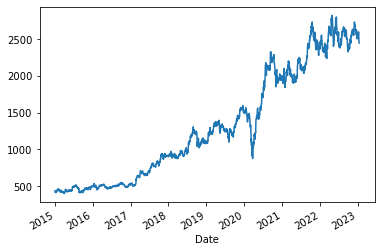

In [21]:
data['Close'].plot()

## Rolling Mean & Rolling Standard deviation

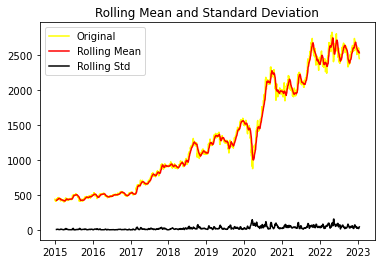

Results of AD-fuller test
Test Statistics                  -0.556305
p-value                           0.880553
No. of lags used                  5.000000
Number of observations used    1981.000000
critical value (1%)              -3.433655
critical value (5%)              -2.863000
critical value (10%)             -2.567547
dtype: float64


In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of AD-fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(data)



In [23]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

## Seasonal Decompositions

<Figure size 432x288 with 0 Axes>

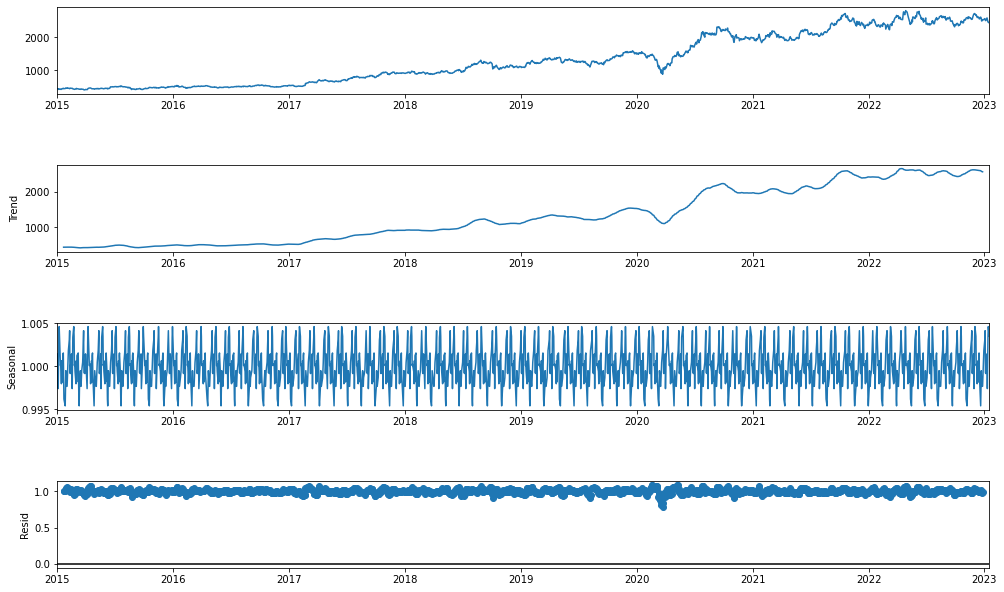

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative',period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


For time series analysis we separate Trend and Seasonality from the time series.

## Logarithmic model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


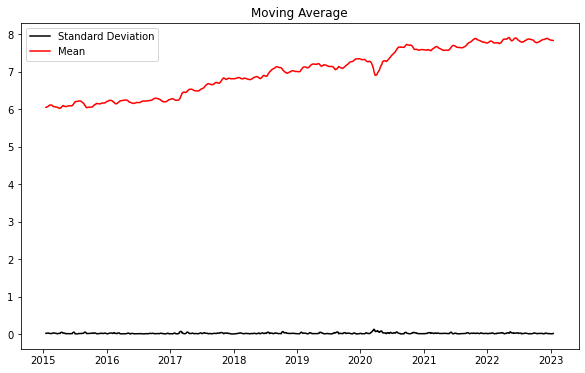

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

## Train & Test Split

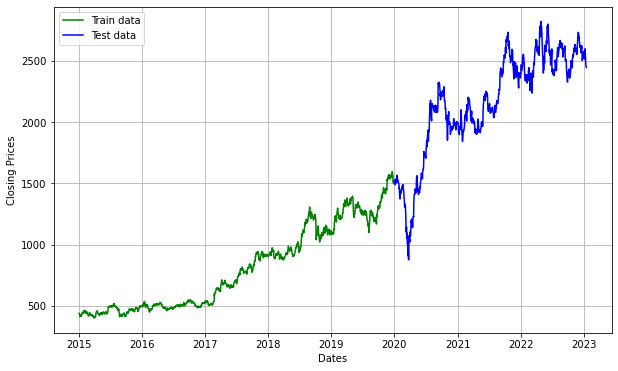

In [26]:
train=data[(data['Close'].index.get_level_values(0)>='2015-01-01')&(data['Close'].index.get_level_values(0)<='2020-01-01')]
test=data[(data['Close'].index.get_level_values(0)>'2020-01-01')]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

In [27]:
train

,Close
Date,
2015-01-01,439.781311
2015-01-02,438.617340
2015-01-05,433.812897
2015-01-06,414.124512
2015-01-07,423.139069
...,...
2019-12-26,1501.170410
2019-12-27,1527.867310
2019-12-30,1529.699951


In [28]:
test.shape

(757, 1)

## Shift Model

In [29]:
data['Close First Difference'] = data['Close'] - data['Close'].shift(12)

In [30]:
data['Close'].shift(12)

Date
2015-01-01            NaN
2015-01-02            NaN
2015-01-05            NaN
2015-01-06            NaN
2015-01-07            NaN
                 ...     
2023-01-10    2502.199951
2023-01-11    2524.050049
2023-01-12    2544.699951
2023-01-13    2544.449951
2023-01-16    2543.300049
Name: Close, Length: 1987, dtype: float64

In [31]:
data.head(14)

,Close,Close First Difference
Date,,
2015-01-01,439.781311,NaN
2015-01-02,438.617340,NaN
2015-01-05,433.812897,NaN
2015-01-06,414.124512,NaN
2015-01-07,423.139069,NaN
2015-01-08,417.071564,NaN
2015-01-09,426.110901,NaN
2015-01-12,421.157837,NaN
2015-01-13,417.616425,NaN


In [32]:
## Again test dickey fuller test
adfuller_test(data['Close First Difference'].dropna())

ADF Test Statistic : -7.598178327937587
p-value : 2.428791769219177e-11
#Lags Used : 26
Number of Observations Used : 1948
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


##  ARIMA Model


In [33]:
# # For non-seasonal data
# #p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model=ARIMA(data['Close'],order=(1,1,1))
model_fit=model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1987
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9376.755
Date:                Mon, 16 Jan 2023   AIC                          18759.511
Time:                        18:17:26   BIC                          18776.292
Sample:                             0   HQIC                         18765.675
                               - 1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5099      2.159     -0.236      0.813      -4.741       3.721
ma.L1          0.5140      2.151      0.239      0.811      -3.702       4.730
sigma2       739.4427     11.222     65.892      0.000     717.448     761.437
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):              4028.58
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):              22.35   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

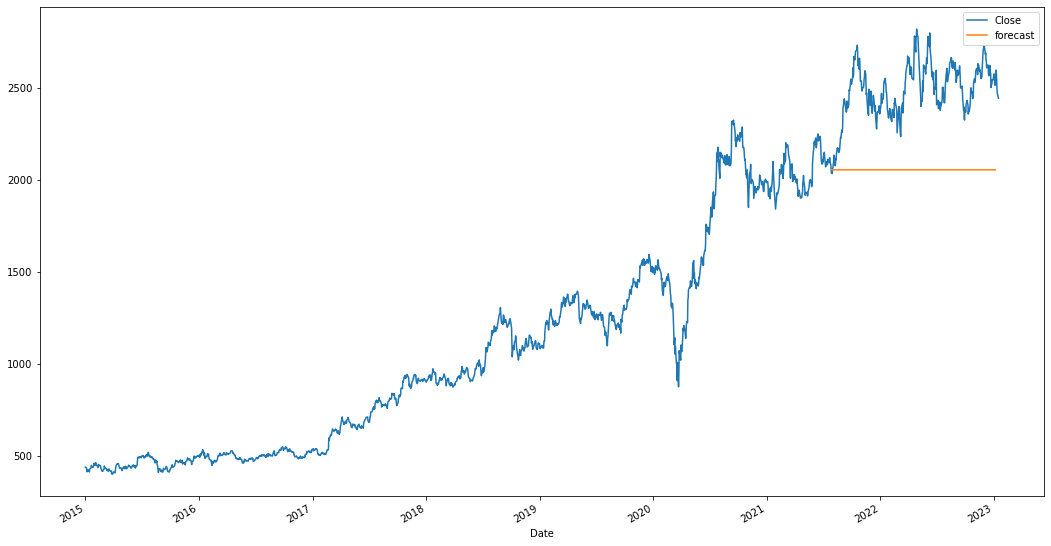

In [36]:
data['forecast']=model_fit.predict(start=1620,end=1980,dynamic=True)
data[['Close','forecast']].plot(figsize=(18,10))

## SARIMAX Model

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

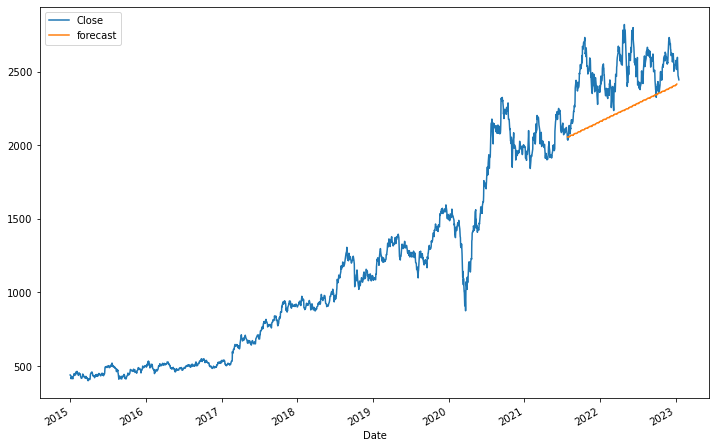

In [37]:
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=1620,end=1980,dynamic=True)
data[['Close','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

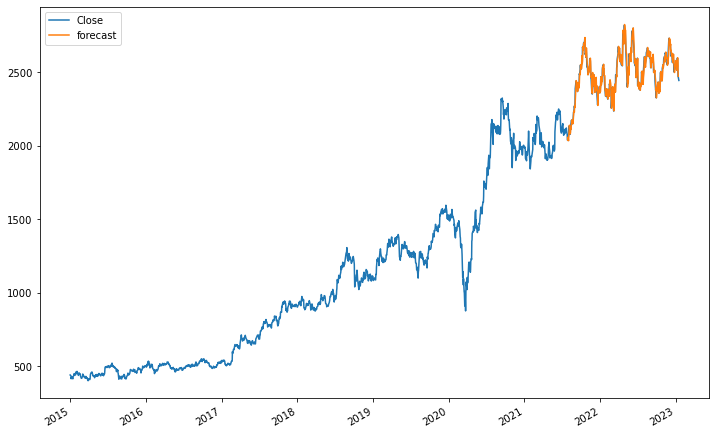

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(days=x)for x in range(0,21)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

future_datest_df.tail()

future_df=pd.concat([data,future_datest_df])

future_df['forecast'] = results.predict(start = 1620, end = 1985, typ='levels')
future_df[['Close', 'forecast']].plot(figsize=(12, 8))

In [39]:
predictions=results.predict(start=1988,end=2018,typ='levels')
predictions.shape

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


(31,)

In [40]:
from datetime import timedelta, date
Date_req = date.today() + timedelta(days=31)
# Date_req

index_future_dates=pd.date_range(start=datetime.today(),end=Date_req)
a = len(data)
predictions.index=index_future_dates
print(predictions)

2023-01-16 18:17:29.083558    2446.481555
2023-01-17 18:17:29.083558    2450.537965
2023-01-18 18:17:29.083558    2450.439435
2023-01-19 18:17:29.083558    2452.809574
2023-01-20 18:17:29.083558    2453.751427
2023-01-21 18:17:29.083558    2454.857595
2023-01-22 18:17:29.083558    2455.307819
2023-01-23 18:17:29.083558    2452.572678
2023-01-24 18:17:29.083558    2451.283976
2023-01-25 18:17:29.083558    2453.398399
2023-01-26 18:17:29.083558    2454.353384
2023-01-27 18:17:29.083558    2458.075057
2023-01-28 18:17:29.083558    2457.178666
2023-01-29 18:17:29.083558    2461.481666
2023-01-30 18:17:29.083558    2461.768804
2023-01-31 18:17:29.083558    2464.207911
2023-02-01 18:17:29.083558    2464.931618
2023-02-02 18:17:29.083558    2465.452123
2023-02-03 18:17:29.083558    2466.289359
2023-02-04 18:17:29.083558    2463.848232
2023-02-05 18:17:29.083558    2463.090092
2023-02-06 18:17:29.083558    2465.265424
2023-02-07 18:17:29.083558    2466.464017
2023-02-08 18:17:29.083558    2470

In [41]:
new_pred = pd.concat([data,predictions], axis=1)
new_pred

,Close,Close First Difference,forecast,predicted_mean
2015-01-01 00:00:00.000000,439.781311,NaN,NaN,NaN
2015-01-02 00:00:00.000000,438.617340,NaN,NaN,NaN
2015-01-05 00:00:00.000000,433.812897,NaN,NaN,NaN
2015-01-06 00:00:00.000000,414.124512,NaN,NaN,NaN
2015-01-07 00:00:00.000000,423.139069,NaN,NaN,NaN
...,...,...,...,...
2023-02-11 18:17:29.083558,NaN,NaN,NaN,2473.890157
2023-02-12 18:17:29.083558,NaN,NaN,NaN,2476.329951
2023-02-13 18:17:29.083558,NaN,NaN,NaN,2477.051485
2023-02-14 18:17:29.083558,NaN,NaN,NaN,2477.566156


In [42]:
from datetime import datetime
d = new_pred.index
new_pred.index = d.strftime('%Y-%m-%d')

In [43]:
new_pred

,Close,Close First Difference,forecast,predicted_mean
2015-01-01,439.781311,NaN,NaN,NaN
2015-01-02,438.617340,NaN,NaN,NaN
2015-01-05,433.812897,NaN,NaN,NaN
2015-01-06,414.124512,NaN,NaN,NaN
2015-01-07,423.139069,NaN,NaN,NaN
...,...,...,...,...
2023-02-11,NaN,NaN,NaN,2473.890157
2023-02-12,NaN,NaN,NaN,2476.329951
2023-02-13,NaN,NaN,NaN,2477.051485
2023-02-14,NaN,NaN,NaN,2477.566156


In [44]:
new_pred.drop(['Close First Difference','forecast'],axis=1,inplace=True)
new_pred

,Close,predicted_mean
2015-01-01,439.781311,NaN
2015-01-02,438.617340,NaN
2015-01-05,433.812897,NaN
2015-01-06,414.124512,NaN
2015-01-07,423.139069,NaN
...,...,...
2023-02-11,NaN,2473.890157
2023-02-12,NaN,2476.329951
2023-02-13,NaN,2477.051485
2023-02-14,NaN,2477.566156


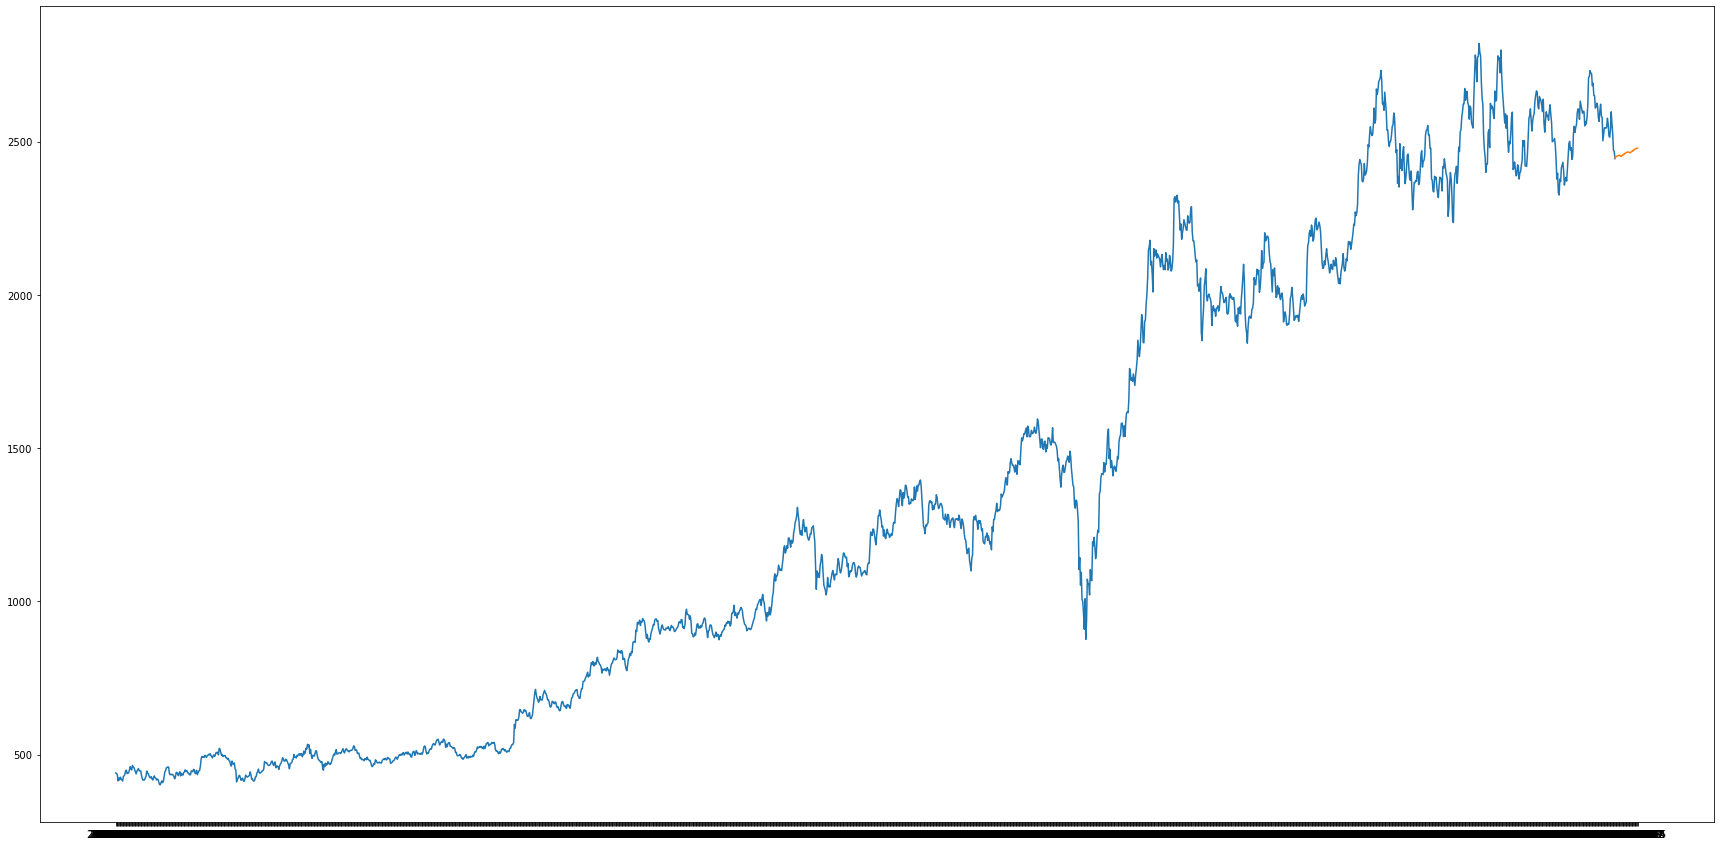

In [45]:
plt.figure(figsize=(30,15))
plt.plot(new_pred)

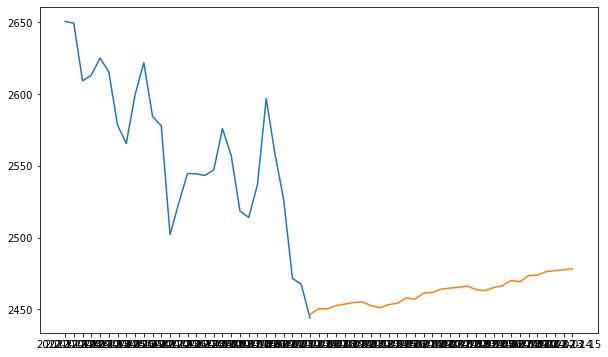

In [46]:
plt.plot(new_pred[1958:2018])